In [2]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the Data Set
df = pd.read_csv('C:/Users/Rahul_Tiwari4/Downloads/ML Projects/DL-and-ML-Practical-Tutorials-Package/DL and ML Practical Tutorials - Package/Project 1/Car_Purchasing_Data.csv', encoding='ISO-8859-1')
df.head(10) # Top 10 rows for the Data Set.

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


In [4]:
#Statistical Summary for the Car Purchase Data Set
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
df.isnull().sum() # checking for missing values for any columns

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

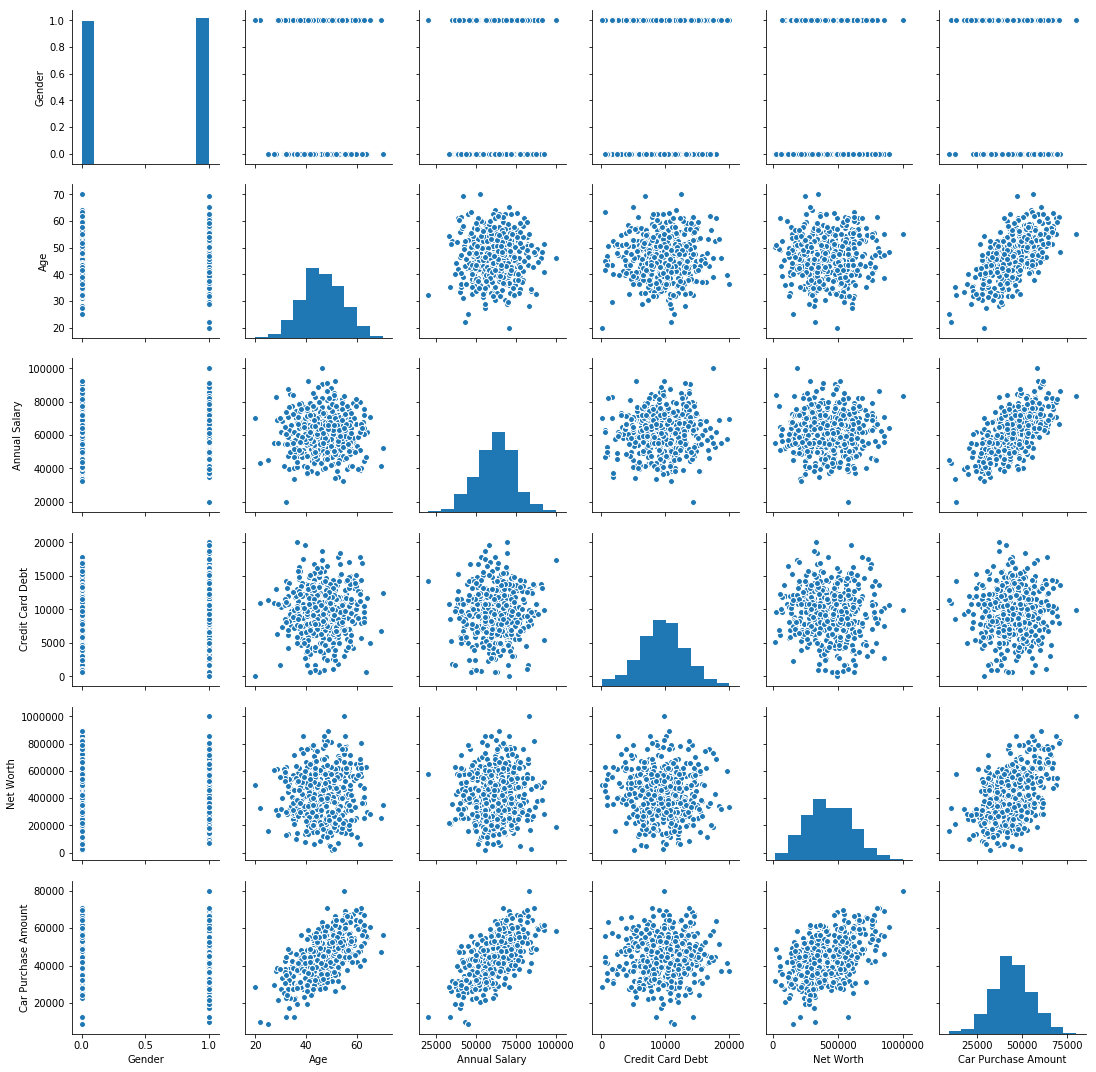

In [6]:
#Visualizing the Data Set
sns.pairplot(df)

In [7]:
# Dropping the Unnecessary Columns for the Independent Variables and storing data into 'X' variable.
X = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
X.shape

(500, 5)

In [8]:
# Taking Output Variable into 'y' Variable.
y = df['Car Purchase Amount']
y.shape

(500,)

In [9]:
#Feature Engineering / Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

In [10]:
# Reshaping the Data so that it can be Scaled accordingly
y = y.values.reshape(-1,1)
y.shape

(500, 1)

In [11]:
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

In [12]:
#Splitting the Data Set into Train & Test Data Sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size= 0.25)

In [ ]:
# Importing necessary libraries for using ANNs
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()   #type of ANN model
model.add(Dense(25, input_dim=5, activation='relu'))  # 25 - number of inputs in hidden layer
model.add(Dense(25, activation='relu')) # 25 - number of inputs in hidden layer
model.add(Dense(1, activation='linear')) # 1 - number of inputs in hidden layer
model.summary()  # it will show the summary for total parameters/trainable parameters.

In [ ]:
#Compiling, Running and Evaluating the Model.
model.compile(optimizer='adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)

# Evaluating the Model
# Note that input data must be normalized

X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
y_predict_sample = model.predict(X_test_sample)

print('Expected Purchase Amount=', y_predict_sample)

y_predict_sample_orig = scaler_y.inverse_transform(y_predict_sample)
# Above statement will provide the expected price given by customer for Car Purchase.
print('Expected Purchase Amount=', y_predict_sample_orig)  